# ***Insights Summary:***

**Cluster 0 - Young Affluent Shoppers – High income, high spenders:** These are relatively young customers with a high income and a very high spending score. They are likely affluent, frequent shoppers who are willing to spend on premium products. They could be targeted with VIP services, exclusive offers, or something that make them feel special (a voucher on their birthday).

**Cluster 1 - Affluent but Conservative Spenders – High income, low spenders:** These are high-income customers who tend to shop selectively and prefer saving over frequent spending. Encourage them to increase their basket size by offering discounts on complementary items when they purchase their usual products. For example, when they buy their usual clothing or accessory, provide special offers on matching shoes or bags. To inspire them to explore new products or higher-end options, send promotions for seasonal or premium items.

**Cluster 2 - Middle-Aged Moderate Shoppers – Moderate income and spending:** Middle-aged individuals with moderate income and spending patterns. They may be practical shoppers, focused on essential purchases rather than indulgent spending. Discounts on mid-range products could increase engagement.

**Cluster 3 - Young Value-Conscious Shoppers – Low income but willing to spend on good deals:** These are younger customers with lower income but moderate spending scores. They may be more budget-conscious but still willing to spend on affordable luxuries. Marketing strategies could focus on special deals, discounts, or trendy, low-cost products.

**Cluster 4 - Older Practical Shoppers – Moderate income, careful spenders:** These customers are older with moderate income and low to moderate spending. They may prefer functional or necessity-driven purchases rather than indulgence. They can be targeted with practical products and promotions that emphasize convenience and utility.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df['CustomerID'] = df['CustomerID'].astype('str')

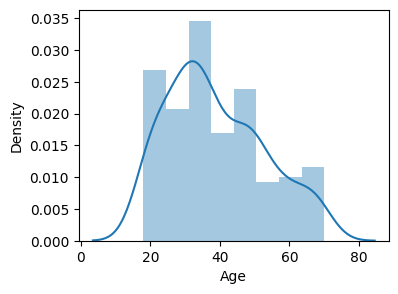

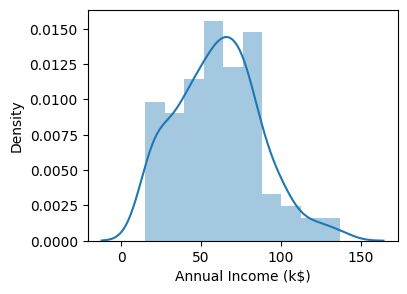

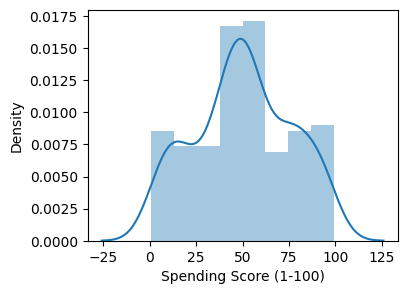

In [7]:
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(4,3))
    sns.distplot(df[col])

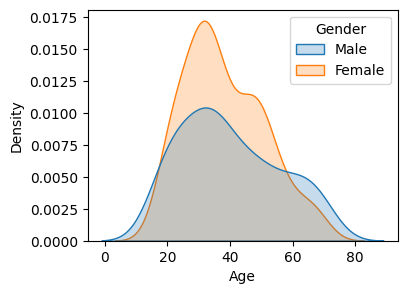

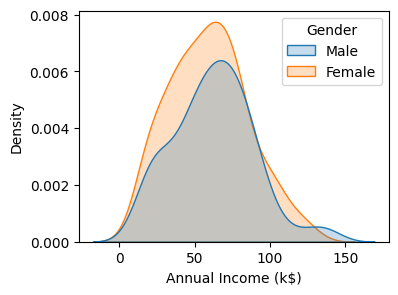

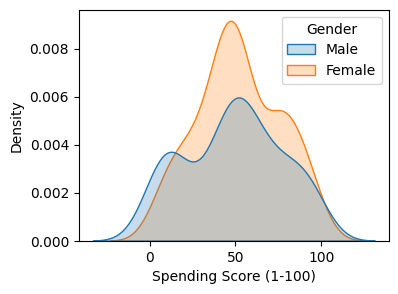

In [8]:
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(4,3))
    sns.kdeplot(data=df, x=col, shade=True, hue='Gender')

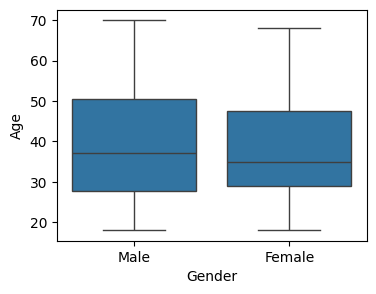

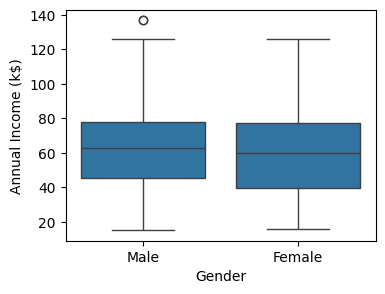

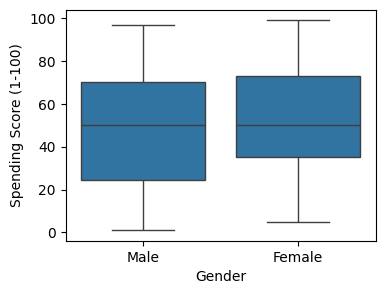

In [9]:
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(4,3))
    sns.boxplot(data=df, x='Gender', y=col)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

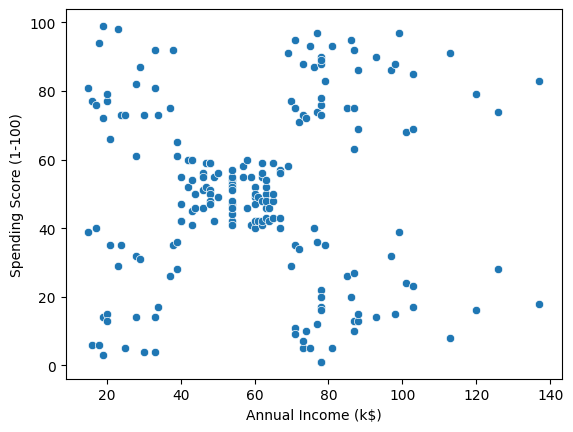

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

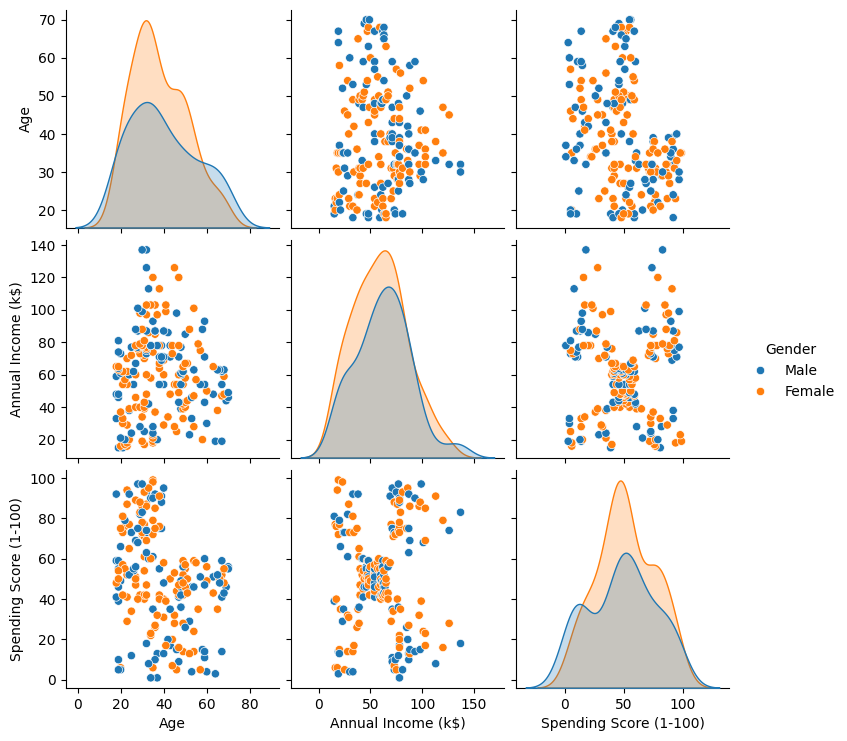

In [11]:
sns.pairplot(df, hue='Gender')

In [12]:
df.select_dtypes(include=['number']).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

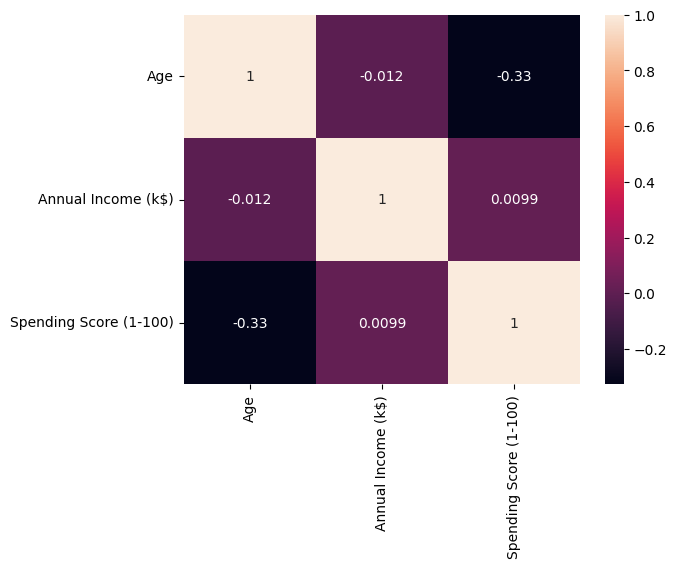

In [13]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

# **Standard Scaling**

In [14]:
scaler = StandardScaler()

In [15]:
dff = pd.get_dummies(df.drop('CustomerID',axis=1), drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [16]:
dff = pd.DataFrame(scaler.fit_transform(dff))

In [17]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


# **K-Means Clustering**

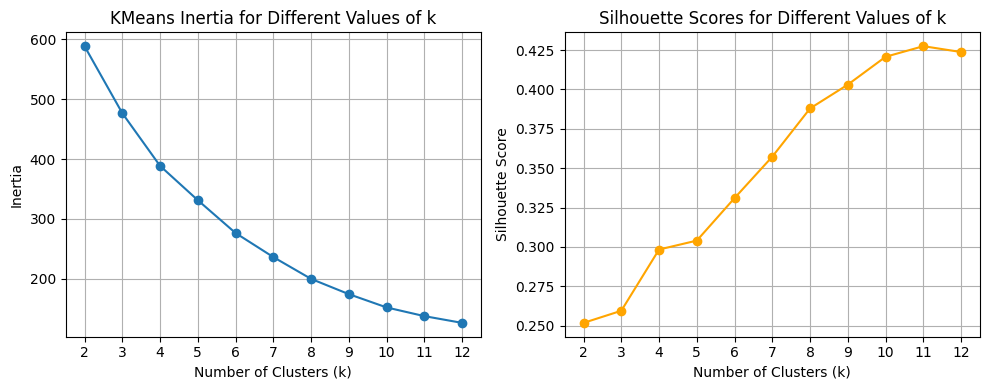

In [18]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(dff)
    sil_score = silhouette_score(dff, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(dff)

cluster_labels

array([3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 4, 2, 4, 2, 4, 3, 4, 4, 3, 2, 2, 4, 3,
       2, 2, 3, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 2, 4, 4, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 3, 4, 2, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 4, 4,
       4, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [20]:
df["Cluster"] = cluster_labels

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [21]:
df['Cluster'].value_counts()

,count
Cluster,
3,54
2,43
0,39
4,35
1,29


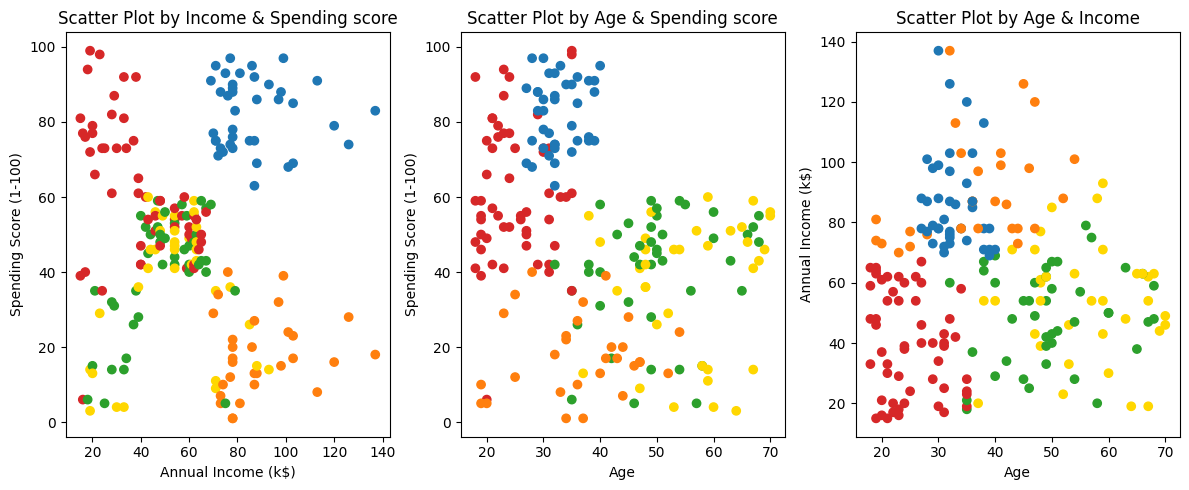

In [22]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728',  # Red
                  4: '#ffd700'}  # Yellow

colors = df['Cluster'].map(cluster_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=colors, # Colors for each cluster
            marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot by Income & Spending score')

plt.subplot(1, 3, 2)
plt.scatter(df['Age'],
            df['Spending Score (1-100)'],
            c=colors,
            marker='o')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot by Age & Spending score')

plt.subplot(1, 3, 3)
plt.scatter(df['Age'],
            df['Annual Income (k$)'],
            c=colors,
            marker='o')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot by Age & Income')

plt.tight_layout()
plt.show()

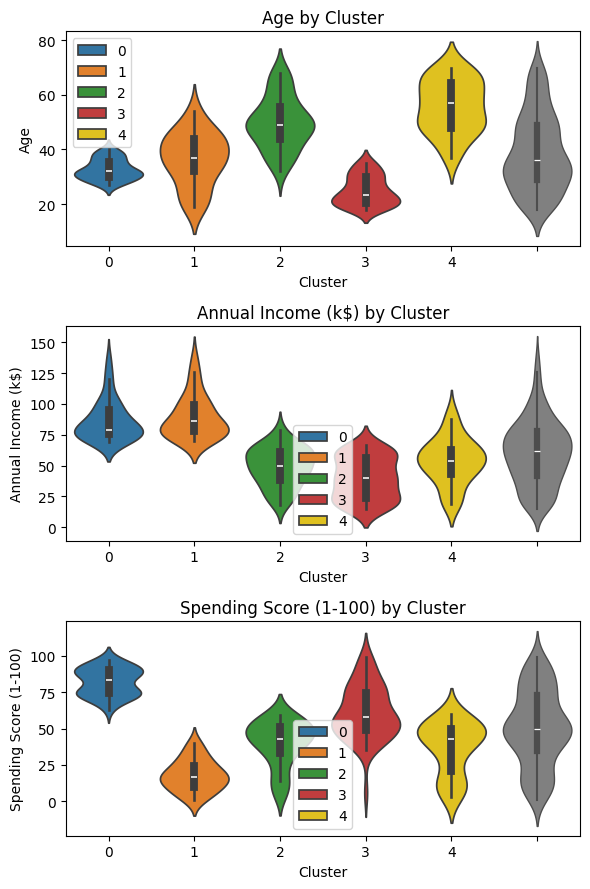

In [23]:
plt.figure(figsize=(6, 9))

plt.subplot(3, 1, 1)
sns.violinplot(x=df['Cluster'], y=df['Age'], palette=cluster_colors, hue=df["Cluster"])
sns.violinplot(y=df['Age'], color='gray', linewidth=1.0)
plt.title('Age by Cluster')
plt.ylabel('Age')

plt.subplot(3, 1, 2)
sns.violinplot(x=df['Cluster'], y=df['Annual Income (k$)'], palette=cluster_colors, hue=df["Cluster"])
sns.violinplot(y=df['Annual Income (k$)'], color='gray', linewidth=1.0)
plt.title('Annual Income (k$) by Cluster')
plt.ylabel('Annual Income (k$)')


plt.subplot(3, 1, 3)
sns.violinplot(x=df['Cluster'], y=df['Spending Score (1-100)'], palette=cluster_colors, hue=df["Cluster"])
sns.violinplot(y=df['Spending Score (1-100)'], color='gray', linewidth=1.0)
plt.title('Spending Score (1-100) by Cluster')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [24]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.692308,86.538462,82.128205
1,36.482759,89.517241,18.000000
2,49.813953,49.232558,40.069767
3,24.907407,39.722222,61.203704
4,55.714286,53.685714,36.771429


# **Insights from Clustering**

**Cluster 0 - Young Affluent Shoppers – High income, high spenders:** These are relatively young customers with a high income and a very high spending score. They are likely affluent, frequent shoppers who are willing to spend on premium products. They could be targeted with VIP services, exclusive offers, or something that make them feel special (a voucher on their birthday).

**Cluster 1 - Affluent but Conservative Spenders – High income, low spenders:** These are high-income customers who tend to shop selectively and prefer saving over frequent spending. Encourage them to increase their basket size by offering discounts on complementary items when they purchase their usual products. For example, when they buy their usual clothing or accessory, provide special offers on matching shoes or bags. To inspire them to explore new products or higher-end options, send promotions for seasonal or premium items.

**Cluster 2 - Middle-Aged Moderate Shoppers – Moderate income and spending:** Middle-aged individuals with moderate income and spending patterns. They may be practical shoppers, focused on essential purchases rather than indulgent spending. Discounts on mid-range products could increase engagement.

**Cluster 3 - Young Value-Conscious Shoppers – Low income but willing to spend on good deals:** These are younger customers with lower income but moderate spending scores. They may be more budget-conscious but still willing to spend on affordable luxuries. Marketing strategies could focus on special deals, discounts, or trendy, low-cost products.

**Cluster 4 - Older Practical Shoppers – Moderate income, careful spenders:** These customers are older with moderate income and low to moderate spending. They may prefer functional or necessity-driven purchases rather than indulgence. They can be targeted with practical products and promotions that emphasize convenience and utility.